In [1]:
import pandas as pd
import re

In [2]:
import os
import chardet

In [3]:
rawdata = open('/Users/raj/Desktop/Tutorial/chat.csv', 'rb').read()
result = chardet.detect(rawdata)
char_enc = result['encoding']

df = pd.read_csv('/Users/raj/Desktop/Tutorial/chat.csv', encoding=char_enc)

In [4]:
df.head()

,DateTime,Sender,Message,Sentiment,Type
0,"[10:20, 06/07/2023",Engr Barney Bournemouth,A little update. If you are September 2021 set...,Negative,School
1,"[10:38, 06/07/2023",+44 7747 260368,"Yeah, except you finish your placement some m...",Negative,School
2,"[10:44, 06/07/2023",Engr Barney Bournemouth,"Yeah, finish and submit reports before 31st Ju...",Negative,School
3,"[10:20, 21/06/2023",+44 7867 103842,Smart system grades are out.,Positive,School
4,"[11:53, 21/06/2023",+91 99400 24954,any idea on when the dissertation results wil...,Normal,School


In [5]:
df['DateTime'] = df['DateTime'].astype(str).str.replace("[", "", regex=False)

df['DateTime'] = pd.to_datetime(df['DateTime'], format="%H:%M, %d/%m/%Y")


In [6]:
df.head()

,DateTime,Sender,Message,Sentiment,Type
0,2023-07-06 10:20:00,Engr Barney Bournemouth,A little update. If you are September 2021 set...,Negative,School
1,2023-07-06 10:38:00,+44 7747 260368,"Yeah, except you finish your placement some m...",Negative,School
2,2023-07-06 10:44:00,Engr Barney Bournemouth,"Yeah, finish and submit reports before 31st Ju...",Negative,School
3,2023-06-21 10:20:00,+44 7867 103842,Smart system grades are out.,Positive,School
4,2023-06-21 11:53:00,+91 99400 24954,any idea on when the dissertation results wil...,Normal,School


In [7]:
import matplotlib.pyplot as plt

In [8]:
!pip install wordcloud

In [9]:
from wordcloud import WordCloud

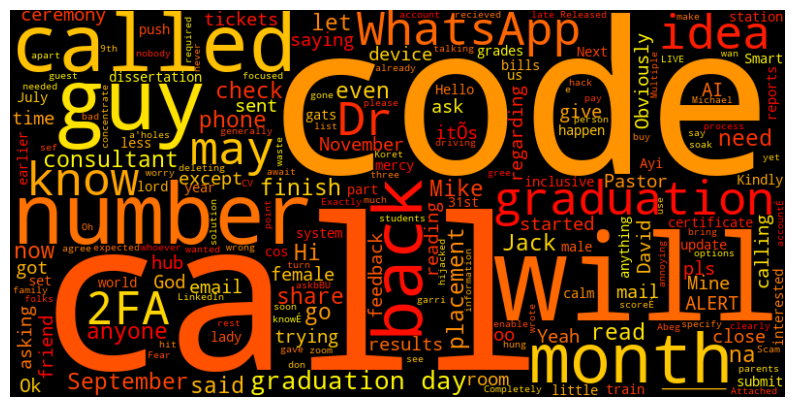

In [10]:
def generate_wordcloud(text_column, colormap='viridis', background_color='black'):
    # Concatenate all the text in the column
    text = ' '.join(text_column.tolist())
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color=background_color, colormap=colormap).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
generate_wordcloud(df['Message'],colormap="autumn")

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/raj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
words = []
for text in df['Message']:
    txt = nltk.word_tokenize(text)
    words+=txt

In [13]:
import plotly.express as px

In [14]:
from collections import Counter

y = Counter(words).most_common(20)
y1 = pd.DataFrame(y).rename(columns = {0:'words',1:'n'})

fig = px.line(y1,x = 'words' ,y = 'n')

In [15]:
fig.show()

In [ ]:
print(df['Type'].value_counts())

The above result shows an in balance data. Thus we will try to either undersample or oversample it

In [17]:
sch = df[df['Type'] == "School"].sample(frac = 1);print(sch.shape) #getting all aspect of 'school' in the dataset
gen = df[df['Type'] == "General"].sample(frac = 0.28);print(gen.shape) #getting 28% of all instance of 'general' in the dataset. this is the undersampling step (reducing the 'general' instance to make number of instances of each class more equal)
dy = pd.concat([sch,gen], ignore_index = True, axis = 0).sample(frac = 1) #concatenating 'sch' and undersampled 'gen' into a new DataFrame 'dy'. The'sample(frac=1)' part is shuffling the data
dy.head()

(15, 5)
(15, 5)


,DateTime,Sender,Message,Sentiment,Type
14,2023-06-05 21:27:00,+44 7435 681683,On graduation day how much we need to pay for...,Normal,School
28,2023-07-06 13:18:00,+44 7501 080006,The guy is just trying to be annoying because...,Normal,General
12,2023-05-28 00:39:00,+44 7542 316789,"Hi, I got an email from Jack saying that all S...",Negative,School
29,2023-07-06 13:55:00,+44 7444 167014,"I missed the call sha, its paining me.. I hav...",Negative,General
0,2023-06-21 10:20:00,+44 7867 103842,Smart system grades are out.,Positive,School


In [18]:
print(dy.shape)

(30, 5)


The above result shows that the dataset is nor balanced

To be able to feed the data into a machine learning model, we will need to convert the text into vectors.
To do this we will build a vectoriser for the data

In [19]:
# building vectoriser for the data
from sklearn.feature_extraction.text import CountVectorizer

x = [str(i) for i in dy['Message']]
y = dy['Type']

vector = CountVectorizer(ngram_range=(2, 2))
vectors = vector.fit_transform(x)
vectors.toarray()
vectors.shape
vector.get_feature_names_out()

array(['12 months', '2021 set', '2022 students', '2023 as', '2023 but',
       '2024 and', '2fa but', '2fa just', '2fa with', '2fa you',
       '31st july', 'about the', 'about three', 'ai results',
       'all devices', 'all september', 'all your', 'allowed him',
       'an email', 'and ask', 'and bills', 'and had', 'and he',
       'and know', 'and not', 'and submit', 'and to', 'and wasn',
       'annoying because', 'any idea', 'anyone have', 'apart from',
       'are live', 'are my', 'are out', 'are september', 'are upgrading',
       'as expected', 'as long', 'as was', 'as you', 'ask him',
       'askbbu and', 'asking me', 'back hopefully', 'back to', 'be 2023',
       'be 2024', 'be annoying', 'be hacked', 'be out', 'be reading',
       'because clearly', 'because of', 'because wanted', 'been hit',
       'been priming', 'before 31st', 'bills inclusive', 'bring parents',
       'but 12', 'but if', 'but the', 'buy tickets', 'by those',
       'call ______', 'call even', 'call sha',

Next is our Machine learning Model:
- Split the dataset into training and testing set
- Initialize the model and Evaluate performance

In [20]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(vectors,y,test_size = 0.2)

print(x_train.shape,x_test.shape)

(24, 401) (6, 401)


In [21]:
# initializing our model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

#train our model
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
#evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(x_test)

print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

     General       0.50      1.00      0.67         1
      School       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



Deploy the model

In [23]:
text = """Yeah, finish and submit reports before 31st July, which is less than 12 months. Then graduation will be 2023, but 
        12 months placement would push the ceremony to 2024"""
text = """Hi, I got an email from Jack saying that all September 2022 students will have the graduation on November 2024 
        (and not in 2023 as I expected)"""

from ipywidgets import interact
def Modelbuilder(text):
    vec = pd.Series(text)
    y = vector.transform(vec)
    return model.predict(y)
Modelbuilder(text)

array(['School'], dtype=object)

In [24]:
interact(Modelbuilder,text ="enter text")

interactive(children=(Text(value='enter text', description='text'), Output()), _dom_classes=('widget-interact'…

<function __main__.Modelbuilder(text)>

Creating an Interactive Plot using 'ipwidgets' module

In [25]:
import numpy as np

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randint(100,1000,(1000,2))

def plotta(colors = 'green', title = "This is a first title", a=1):
    plt.figure()
    plt.scatter(data[:,0], data[:,1], color = colors)
    plt.title(title)
    plt.show()
    
interact(plotta, colors = ['red', 'green', 'blue'], title = "enter title", a= 10)

interactive(children=(Dropdown(description='colors', index=1, options=('red', 'green', 'blue'), value='green')…

<function __main__.plotta(colors='green', title='This is a first title', a=1)>

In [35]:
import seaborn as sns
def normal(mu, sigma, n, color = "cyan"):
    data = np.random.normal(mu, sigma, int(n))
    sns.displot(data, bins=30, kde=True, color=color)
    plt.show()
interact(normal, mu = (0, 100), sigma =(0.1,1000), n="100", color ="red")

interactive(children=(IntSlider(value=50, description='mu'), FloatSlider(value=500.05, description='sigma', ma…

<function __main__.normal(mu, sigma, n, color='cyan')>